In [78]:
# Load in all the resources for the alpha setup
# I will probably redo the POIs based on the paths of the underwater vehicles
import os
from pathlib import Path
import pandas as pd
import dill
import numpy as np
import sys

In [79]:
cwd = Path(os.getcwd())
alpha_dir = cwd.parent / "env" / "alpha"
connect_dir = alpha_dir / "connectivity.csv"
poi_dir = alpha_dir / "pois.csv"
pathA_dir = alpha_dir / "pathA.csv"
pathB_dir = alpha_dir / "pathB.csv"
pathC_dir = alpha_dir / "pathC.csv"

In [80]:
if str(alpha_dir) not in sys.path:
    sys.path.append(str(alpha_dir))
sys.path
# import waves

['',
 '/opt/ros/iron/lib/python3.10/site-packages',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '/home/gonzaeve/venv/basic/lib/python3.10/site-packages',
 '/home/gonzaeve/python-package/src',
 '/home/gonzaeve/influence-multi-objective/env/alpha/waves.py',
 '/home/gonzaeve/influence-multi-objective/env/alpha']

In [81]:
from waves import wave_x, wave_y

In [82]:
# Useful functions
def load_connectivity_grid(csv_dir):
    df = pd.read_csv(csv_dir)
    return df.to_numpy(int)[:,1:]

def load_pois(csv_dir):
    df = pd.read_csv(csv_dir)
    return df.to_numpy(float)[:,1:]

def load_path(csv_dir):
    df = pd.read_csv(csv_dir)
    return df.to_numpy(float)[:,1:]

def load_waves_pkl(pkl_dir):
    with open(pkl_dir, 'rb') as f:
        waves = dill.load(f)
    return waves['wave_x'], waves['wave_y']

def import_waves(alpha_dir):
    if str(alpha_dir) not in sys.path:
        sys.path.append(str(alpha_dir))
    from waves import wave_x, wave_y

In [83]:
connectivity_grid = load_connectivity_grid(connect_dir)
pois = load_pois(poi_dir)
pathA = load_path(pathA_dir)
pathB = load_path(pathB_dir)
pathC = load_path(pathC_dir)
wave_x, wave_y;

In [84]:
# Visualize
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(grid, ax=None, *args, **kwargs):
    """This is a utility function that plots grids with the correct (x,y) positions"""
    if ax is None:
        plt.imshow(np.rot90(grid), *args, **kwargs, extent=(0.0, grid.shape[1], 0.0, grid.shape[0]))
    else:
        ax.imshow(np.rot90(grid), *args, **kwargs, extent=(0.0, grid.shape[1], 0.0, grid.shape[0]))

def plot_pts(pts, ax=None, *args, **kwargs):
    """This is a utility function that plots the (x,y) points specified"""
    if ax is None:
        plt.plot(pts[:,0], pts[:,1], *args, **kwargs)
    else:
        ax.plot(pts[:,0], pts[:,1], *args, **kwargs)

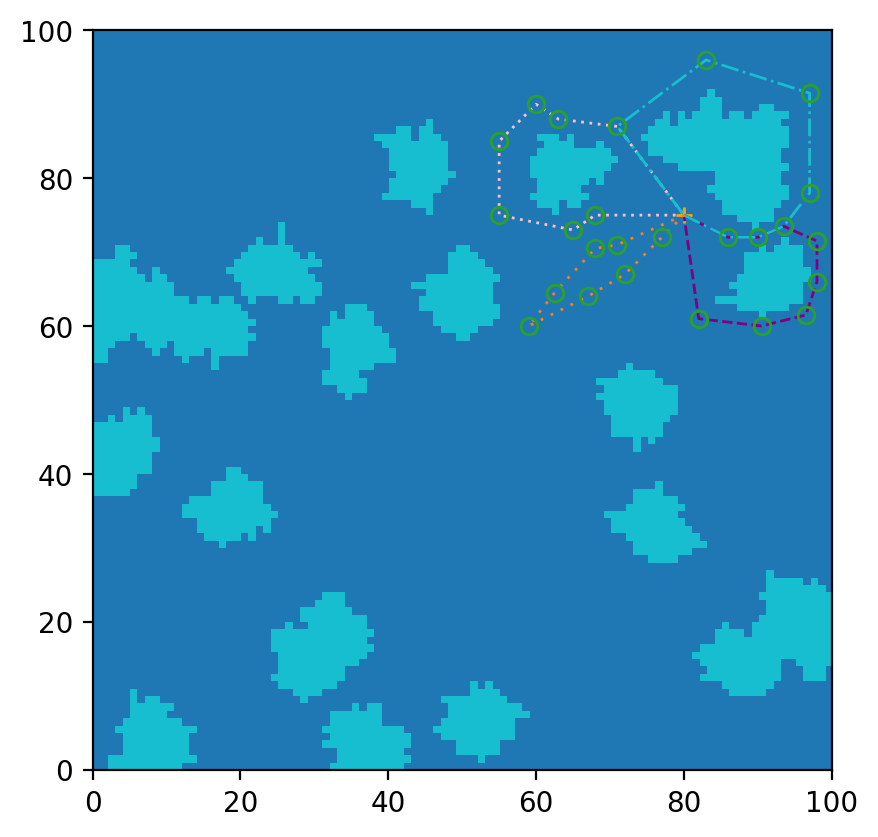

In [85]:
# %matplotlib qt5
fig, ax = plt.subplots(1,1,dpi=200)
plot_grid(connectivity_grid, ax, cmap='tab10_r')
ax.plot(80, 75, '+', color='orange')
A = np.array([
    [80,75],
    [68,75],
    [65, 73],
    [55, 75],
    [55, 85],
    [60,90],
    [63, 88],
    [71, 87],
    [80,75]
])
B = np.array([
    [80,75],
    [86, 72],
    [90, 72],
    [93.5, 73.5],
    [98, 71.5],
    [98, 66],
    [96.5, 61.5],
    [90.5, 60],
    [82, 61],
    [80, 75]
])
C = np.array([
    [80, 75],
    [86, 72],
    [90, 72],
    [93.5, 73.5],
    [97, 78],
    [97, 91.5],
    [83, 96],
    [71, 87],
    [80, 75],
])
D = np.array([
    [80,75],
    [71,71],
    [68, 70.5],
    [62.5, 64.5],
    [59,60],
    [67, 64],
    [72,67],
    [77, 72],
    [80,75]
])
pois = np.array([
    [86,72],
    [93.5,73.5],
    [98,71.5],
    [98, 66],
    [96.5, 61.5],
    [90.5, 60],
    [82, 61],
    [97, 78],
    [97, 91.5],
    [83, 96],
    [71, 87],
    [68,75],
    [65, 73],
    [55, 75],
    [55, 85],
    [60,90],
    [63, 88],
    [71,71],
    [68, 70.5],
    [62.5, 64.5],
    [59,60],
    [67, 64],
    [72,67],
    [77, 72],
    [90, 72]
])
plot_pts(A, ax, ls=(0, (1,2)), color='pink', lw=1)
plot_pts(B, ax, ls='dashed', color='purple', lw=1)
plot_pts(C, ax, ls='dashdot', color='tab:cyan', lw=1)
plot_pts(D, ax, ls=(0, (1,3)), color='tab:orange', lw=1)
plot_pts(pois, ax, marker='o', fillstyle='none', linestyle='none',color='tab:green')

In [90]:
# Save POIs and paths
pathA = pd.DataFrame({'x':A[:,0], 'y':A[:,1]})
pathA.to_csv('../env/alpha/pathA.csv')

pathB = pd.DataFrame({'x':B[:,0], 'y':B[:,1]})
pathB.to_csv('../env/alpha/pathB.csv')

pathC = pd.DataFrame({'x':C[:,0], 'y':C[:,1]})
pathC.to_csv('../env/alpha/pathC.csv')

pathD = pd.DataFrame({'x':D[:,0], 'y':D[:,1]})
pathD.to_csv('../env/alpha/pathD.csv')

pois_ = pd.DataFrame({'x':pois[:,0], 'y':pois[:,1]})
pois_.to_csv('../env/alpha/pois.csv')